In [1]:
import pandas as pd
import graphviz
import pydotplus
from IPython.display import Image  
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz

c:\users\hari\datascience_venvs\venv_ml_regression\lib\site-packages\sklearn\externals\six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "


In [2]:
pd.options.display.max_rows=10

In [3]:
data = pd.read_csv(r"D:\5_DataSets/winequality-white.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [26]:
import seaborn as sns

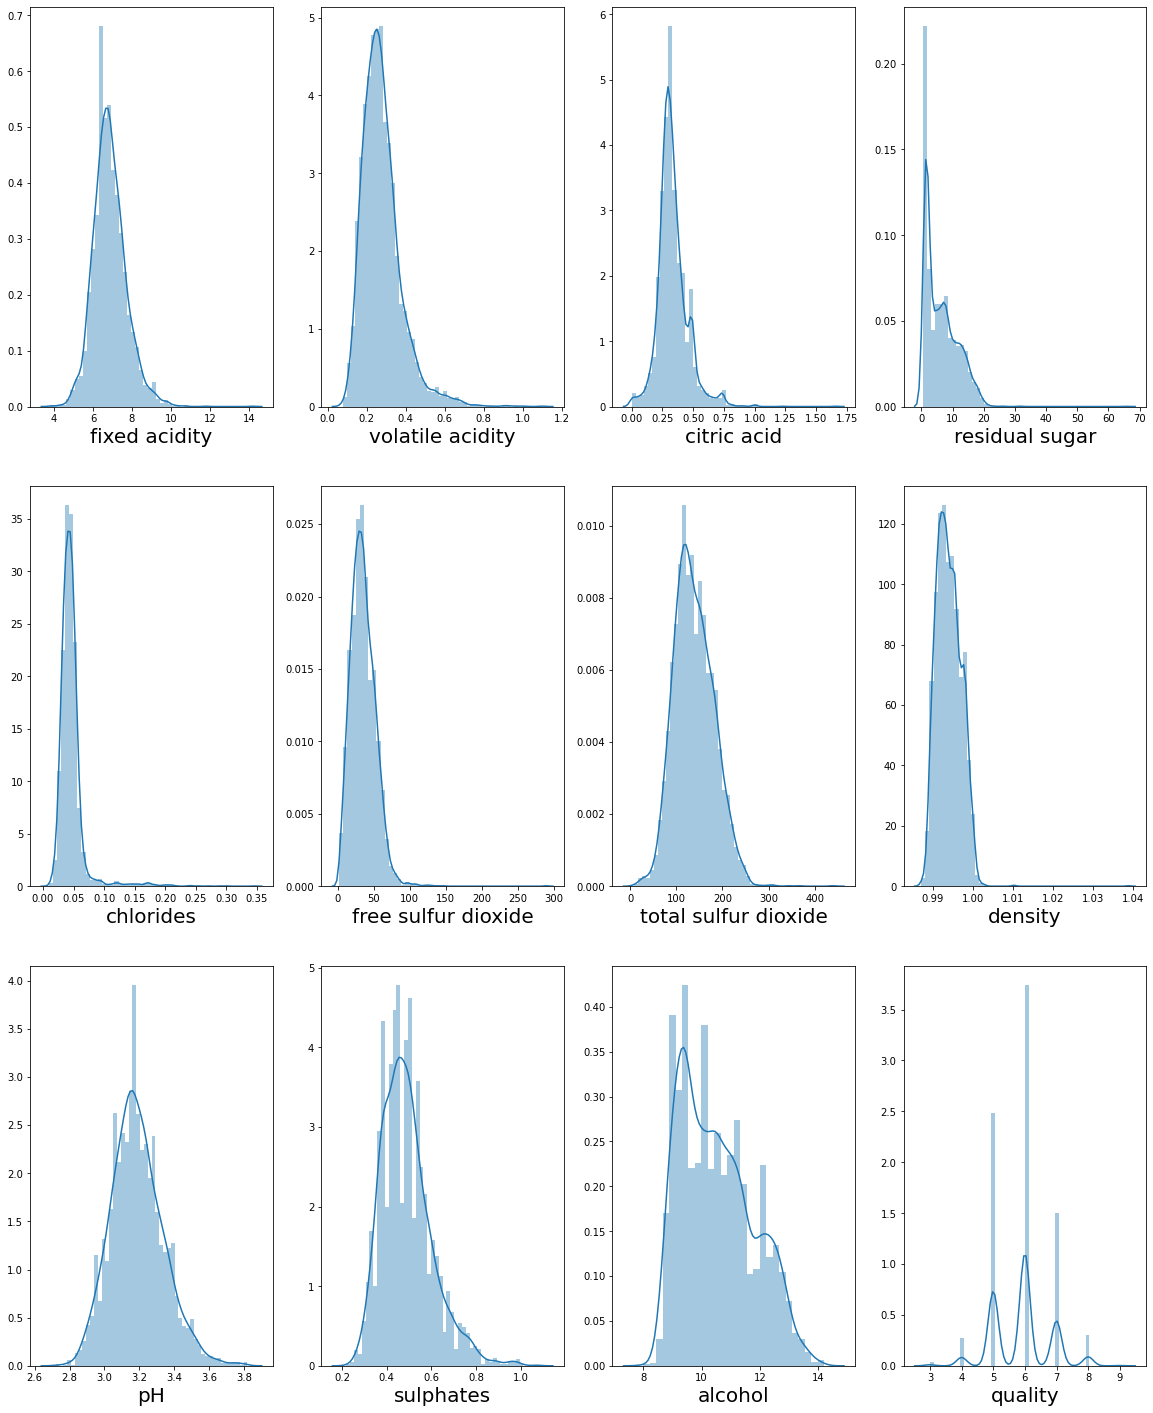

In [27]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=12 :     # as there are 9 columns in the data
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

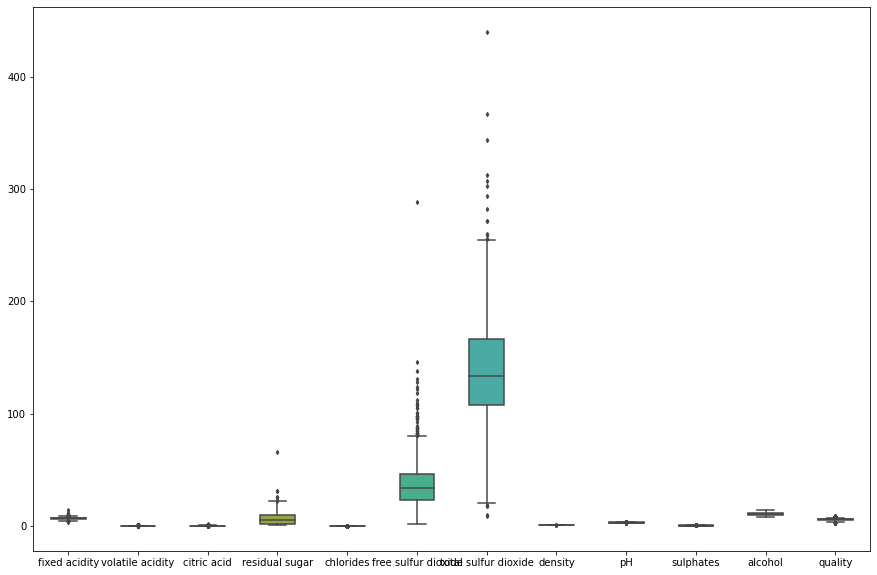

In [28]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [30]:
q = data['residual sugar'].quantile(0.97)
# we are removing the top 2% data from the residual sugar column
data_cleaned = data[data['residual sugar']<q]

q = data_cleaned['free sulfur dioxide'].quantile(0.95)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['free sulfur dioxide']<q]

q = data_cleaned['total sulfur dioxide'].quantile(0.95)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['total sulfur dioxide']<q]


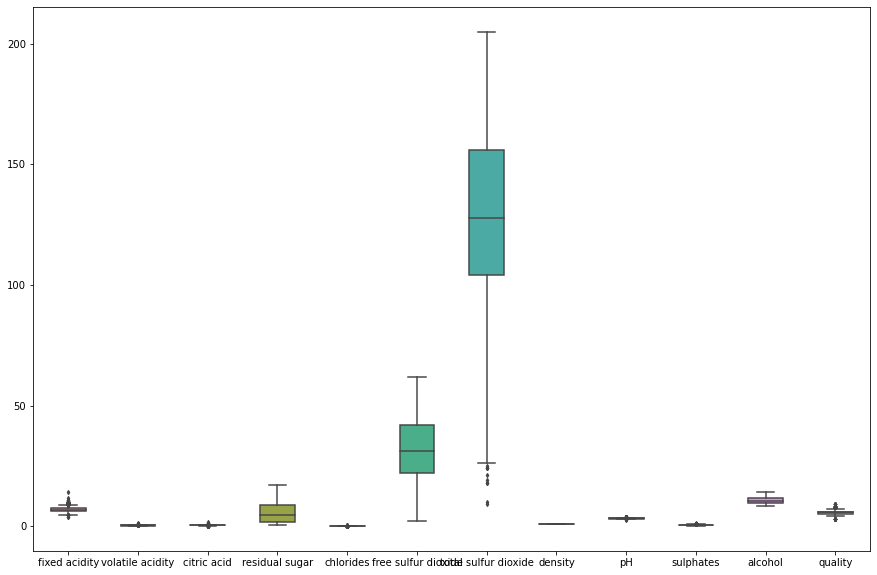

In [32]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_cleaned, width= 0.5,ax=ax,  fliersize=3)

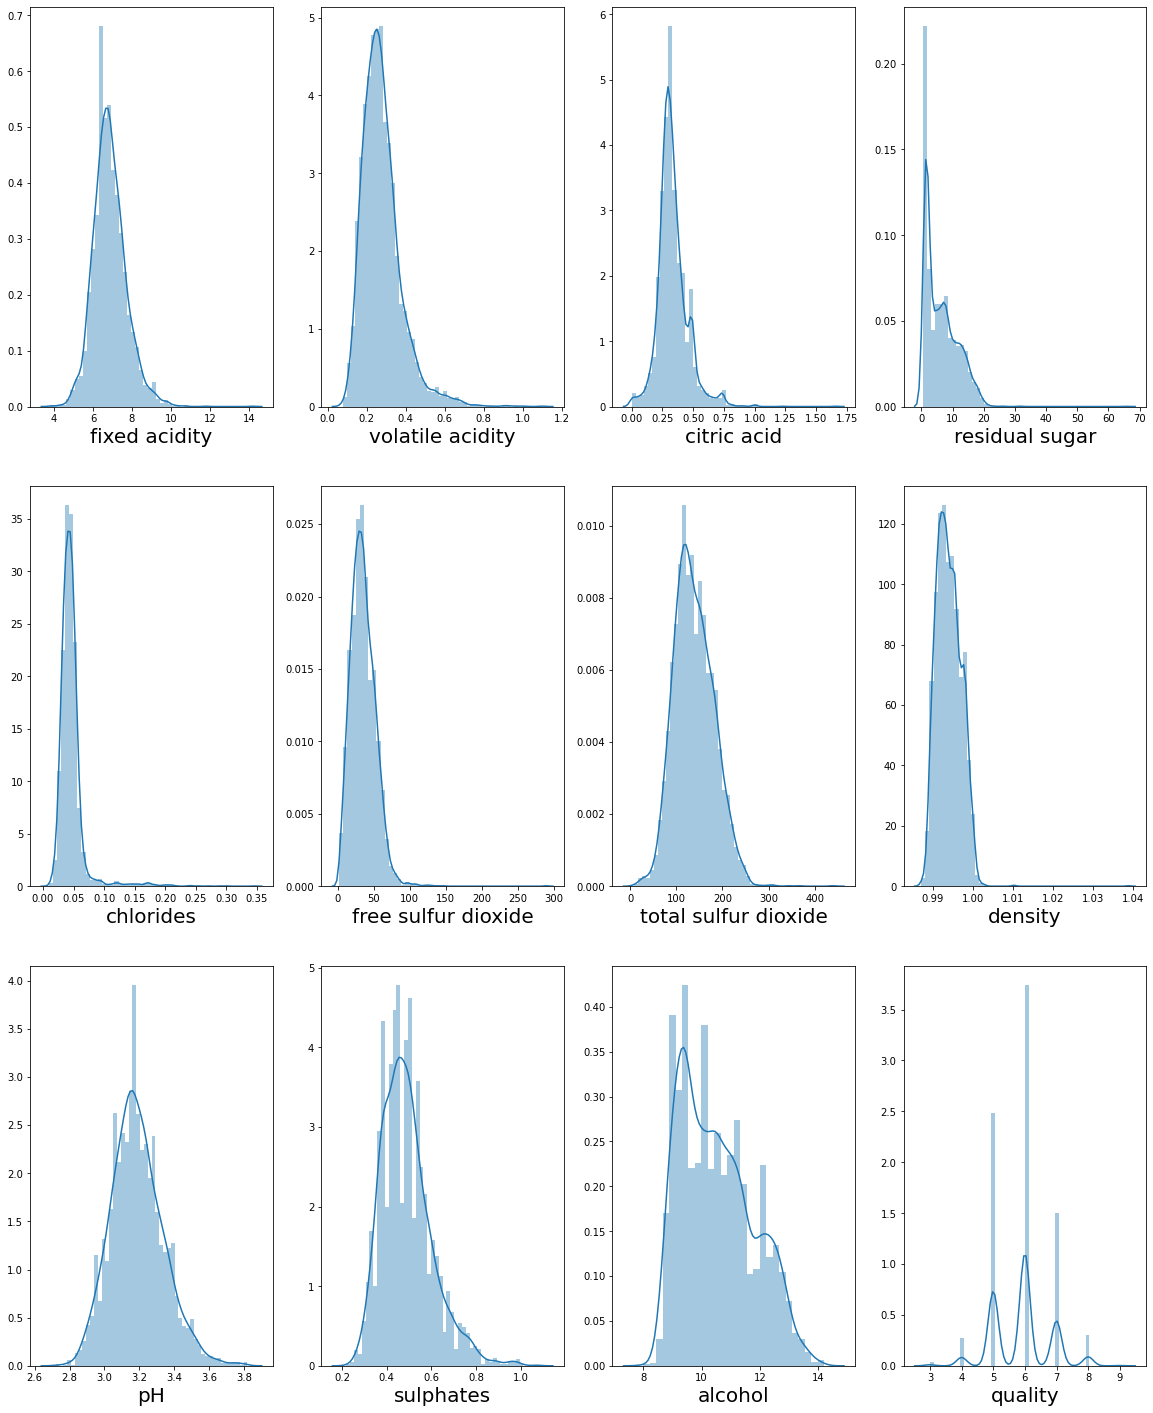

In [33]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=12 :     # as there are 9 columns in the data
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [5]:
X = data.drop(columns = 'quality')
y = data['quality']

In [6]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 355)

In [7]:
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [8]:
clf.score(x_train,y_train)

1.0

In [9]:
py_pred = clf.predict(x_test)

In [10]:
# accuracy of our classification tree
clf.score(x_test,y_test)

0.5945578231292517

### Lets do some tuning

In [11]:
scalar = StandardScaler()

x_transform = scalar.fit_transform(X)

In [12]:
from matplotlib import pyplot as plt

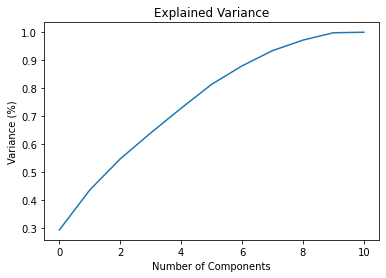

In [13]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(x_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [14]:
pca = PCA(n_components=8)
new_data = pca.fit_transform(x_transform)

principal_cmpnts = pd.DataFrame(new_data,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8'])

In [15]:
principal_cmpnts

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
0,3.676944,-0.545233,-0.930422,-1.135374,-0.292855,-0.891620,0.204664,-1.025184
1,-0.644588,0.430770,-0.356331,0.999117,-0.714078,-0.483738,0.436998,0.584930
2,0.155291,-1.189800,-0.017532,0.270219,-0.367706,-0.500682,0.554319,0.974902
3,1.455374,0.099680,-0.001956,-0.423022,-0.469981,0.769261,-0.197702,0.601653
4,1.455374,0.099680,-0.001956,-0.423022,-0.469981,0.769261,-0.197702,0.601653
...,...,...,...,...,...,...,...,...
4893,-2.094367,0.390789,0.325364,0.088145,-0.755337,-0.283772,-0.108921,-0.148646
4894,1.295014,0.490753,-0.066307,-0.381234,0.267347,0.839791,0.033669,-0.157898
4895,-0.779731,-0.408480,-0.664677,-0.134766,-0.808279,0.133791,-1.616482,-0.278473
4896,-3.407302,0.915744,-0.268297,-0.762126,-0.080705,0.497135,0.978533,-0.165963


In [16]:
# let's see how well our model perform on this new data
x_train,x_test,y_train,y_test = train_test_split(principal_cmpnts,y,test_size = 0.30, random_state= 355)
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.5891156462585034

In [17]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [18]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [19]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [20]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 26, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


In [21]:
grid_search.best_score_

0.5577582941414313

In [22]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =24, min_samples_leaf= 1, min_samples_split= 2, splitter ='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=24, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [23]:
clf.score(x_test,y_test)

0.5863945578231292

In [ ]:
# let's save the model
import pickle

with open('modelForPrediction.sav', 'wb') as f:
    pickle.dump(clf,f)
    
with open('standardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

with open('pca_model.sav', 'wb') as f:
    pickle.dump(pca,f)